### check the difference among different clades strain in different pathway's transcriptional level and CNV 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from scipy.stats import pearsonr
import random

os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

#### 1.check the correlationship between gene copy number and expression

In [46]:
expressionMatrix=pd.read_csv(r'code\6.transcriptomics_ssGEMs_analysis\output\sce969_transcriptome_countMatrix_normalized.csv',index_col=0)
# expressionMatrix=pd.read_csv(r'code\6.transcriptomics_ssGEMs_analysis\output\sce969_transcriptome_tpmMatrix.csv',index_col=0)
cnvMatrix=pd.read_csv('data/geneMatrix/pan1800_v2_blastp_50_70_cnvMatrix.csv',index_col=0)

# remove .fa in cnvMatrix columns
cnvMatrix.columns=[i.replace('.fa','') for i in cnvMatrix.columns]

In [3]:
# extract all metabolic genes
import cobra
model=cobra.io.read_sbml_model(r'model\yeastGEM.xml')
met_geneList=[i.id for i in model.genes if i.id in expressionMatrix.index]
# met_geneList

In [53]:
def count_to_foldchange(expressionMatrix):
    df_expression_log2=expressionMatrix.applymap(lambda x:math.log2(x+1))
    # reference: mean value for rows
    df_expression_log2_mean=df_expression_log2.apply(lambda x: x[x!=0].mean(),axis=1)
    df_expression_foldchange=df_expression_log2.apply(lambda x: x/df_expression_log2_mean,axis=0)
    # fill inf as 10, and nan as 0
    df_expression_foldchange.replace([np.inf, -np.inf], 10,inplace=True)
    df_expression_foldchange.fillna(0,inplace=True)
    return df_expression_foldchange

# z-score normalization
def z_score_convert(df):
    return df.apply(lambda x:(x-x.mean())/x.std(),axis=1)


In [55]:
expression_fcMatrix=count_to_foldchange(expressionMatrix)
met_expression_fcMatrix=expression_fcMatrix[expression_fcMatrix.index.isin(met_geneList)]
# expressionMatrix_z=z_score_convert(expressionMatrix)
# cnvMatrix_z=z_score_convert(cnvMatrix)
# met_expression_z=expressionMatrix_z.loc[met_geneList]

C:\Users\wangh\AppData\Local\Temp\ipykernel_31376\3752473038.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_expression_log2=expressionMatrix.applymap(lambda x:math.log2(x+1))


In [49]:
# commonGenes=list(set(expressionMatrix.index).intersection(set(cnvMatrix.index)))
# commnonSamples=list(set(expressionMatrix.columns).intersection(set(cnvMatrix.columns)))
# commonGenes=list(set(expressionMatrix.index).intersection(set(cnvMatrix.index)).intersection(set(expressionMatrix_z.index)))
# commnonSamples=list(set(expressionMatrix.columns).intersection(set(cnvMatrix.columns)).intersection(set(expressionMatrix_z.columns)))
# met_commonGenes=list(set(met_expression_z.index).intersection(set(cnvMatrix.index)))

# expressionMatrix=expressionMatrix.loc[commonGenes,commnonSamples]
# cnvMatrix=cnvMatrix.loc[commonGenes,commnonSamples]
# expressionMatrix_z=expressionMatrix_z.loc[commonGenes,commnonSamples]
# cnvMatrix_z=cnvMatrix_z.loc[commonGenes,commnonSamples]
# met_cnvMatrix=cnvMatrix.loc[met_commonGenes,commnonSamples]
# met_expressionMatrix=expressionMatrix.loc[met_commonGenes,commnonSamples]

# met_expression_z=met_expression_z.loc[met_commonGenes,commnonSamples]
# met_cnvMatrix_z=cnvMatrix_z.loc[met_commonGenes,commnonSamples]

In [56]:
commonGenes=list(set(expressionMatrix.index).intersection(set(cnvMatrix.index)).intersection(set(expression_fcMatrix.index)))
commnonSamples=list(set(expressionMatrix.columns).intersection(set(cnvMatrix.columns)).intersection(set(expression_fcMatrix.columns)))
met_commonGenes=list(set(met_expression_fcMatrix.index).intersection(set(cnvMatrix.index)))

expressionMatrix=expressionMatrix.loc[commonGenes,commnonSamples]
cnvMatrix=cnvMatrix.loc[commonGenes,commnonSamples]
expressionMatrix_fc=expression_fcMatrix.loc[commonGenes,commnonSamples]
met_cnvMatrix=cnvMatrix.loc[met_commonGenes,commnonSamples]
met_expressionMatrix=expressionMatrix.loc[met_commonGenes,commnonSamples]

met_expression_fcMatrix=met_expression_fcMatrix.loc[met_commonGenes,commnonSamples]

In [57]:
# abosolute expression and CNV data
mean_expression=expressionMatrix.mean(axis=1)
mean_cnv=cnvMatrix.mean(axis=1)
cv_expression=expressionMatrix.std(axis=1)/mean_expression
cv_cnv=cnvMatrix.std(axis=1)/mean_cnv

# foldchange expression
mean_expression_fc=expressionMatrix_fc.mean(axis=1)
cv_expression_fc=expressionMatrix_fc.std(axis=1)/mean_expression_fc


# for metabolic genes
mean_cnv_met=met_cnvMatrix.mean(axis=1)
mean_expression_met=met_expressionMatrix.mean(axis=1)
cv_expression_met=met_expressionMatrix.std(axis=1)/mean_expression_met
cv_cnv_met=met_cnvMatrix.std(axis=1)/mean_cnv_met
mean_expression_fc_met=met_expression_fcMatrix.mean(axis=1)
cv_expression_fc_met=met_expression_fcMatrix.std(axis=1)/mean_expression_fc_met

# fill na with 0
cv_expression=cv_expression.fillna(0)
cv_cnv=cv_cnv.fillna(0)
cv_cnv_met=cv_cnv_met.fillna(0)
cv_expression_met=cv_expression_met.fillna(0)

cv_expression_fc=cv_expression_fc.fillna(0)
cv_expression_fc_met=cv_expression_fc_met.fillna(0)

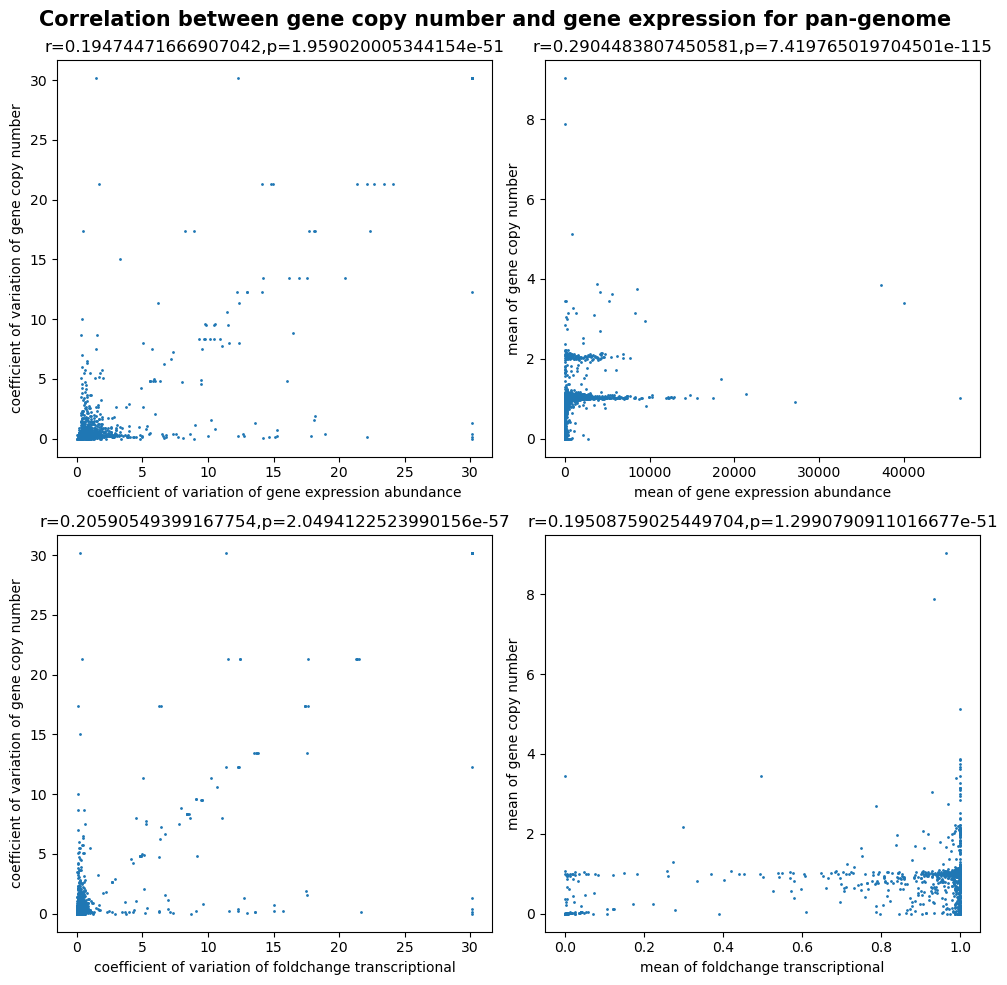

In [58]:
# calculate the pearson correlation coefficient
from scipy.stats import pearsonr,spearmanr
r_cv_expression_cnv=spearmanr(cv_expression,cv_cnv)
r_mean_expression_cnv=spearmanr(mean_expression,mean_cnv)
r_cv_expfc_cnv=spearmanr(cv_expression_fc,cv_cnv)
r_mean_expfc_cnv=spearmanr(mean_expression_fc,mean_cnv)

# plot the scatter plot for cv_expression&cv_cnv, mean_expression&mean_cnv ,calculate the correlation coefficient
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns,set()
ax[0,0].scatter(cv_expression,cv_cnv,s=1)
ax[0,0].set_xlabel('coefficient of variation of gene expression abundance')
ax[0,0].set_ylabel('coefficient of variation of gene copy number')
ax[0,0].set_title('r=%s,p=%s'%(r_cv_expression_cnv[0],r_cv_expression_cnv[1]))
ax[0,1].scatter(mean_expression,mean_cnv,s=1)
ax[0,1].set_xlabel('mean of gene expression abundance')
ax[0,1].set_ylabel('mean of gene copy number')
ax[0,1].set_title('r=%s,p=%s'%(r_mean_expression_cnv[0],r_mean_expression_cnv[1]))
ax[1,0].scatter(cv_expression_fc,cv_cnv,s=1)
ax[1,0].set_xlabel('coefficient of variation of foldchange transcriptional')
ax[1,0].set_ylabel('coefficient of variation of gene copy number')
ax[1,0].set_title('r=%s,p=%s'%(r_cv_expfc_cnv[0],r_cv_expfc_cnv[1]))
ax[1,1].scatter(mean_expression_fc,mean_cnv,s=1)
ax[1,1].set_xlabel('mean of foldchange transcriptional')
ax[1,1].set_ylabel('mean of gene copy number')
ax[1,1].set_title('r=%s,p=%s'%(r_mean_expfc_cnv[0],r_mean_expfc_cnv[1]))
fig.suptitle('Correlation between gene copy number and gene expression for pan-genome',fontsize=15,weight='bold')
plt.tight_layout()
plt.show()

- conclusion:
1. 不同基因的平均表达水平差异和基因拷贝数差异几乎没有相关性
2. 相同基因在不同菌株中的表达水平差异的变化和拷贝数变化的差异有着较强的相关性，r=0.78

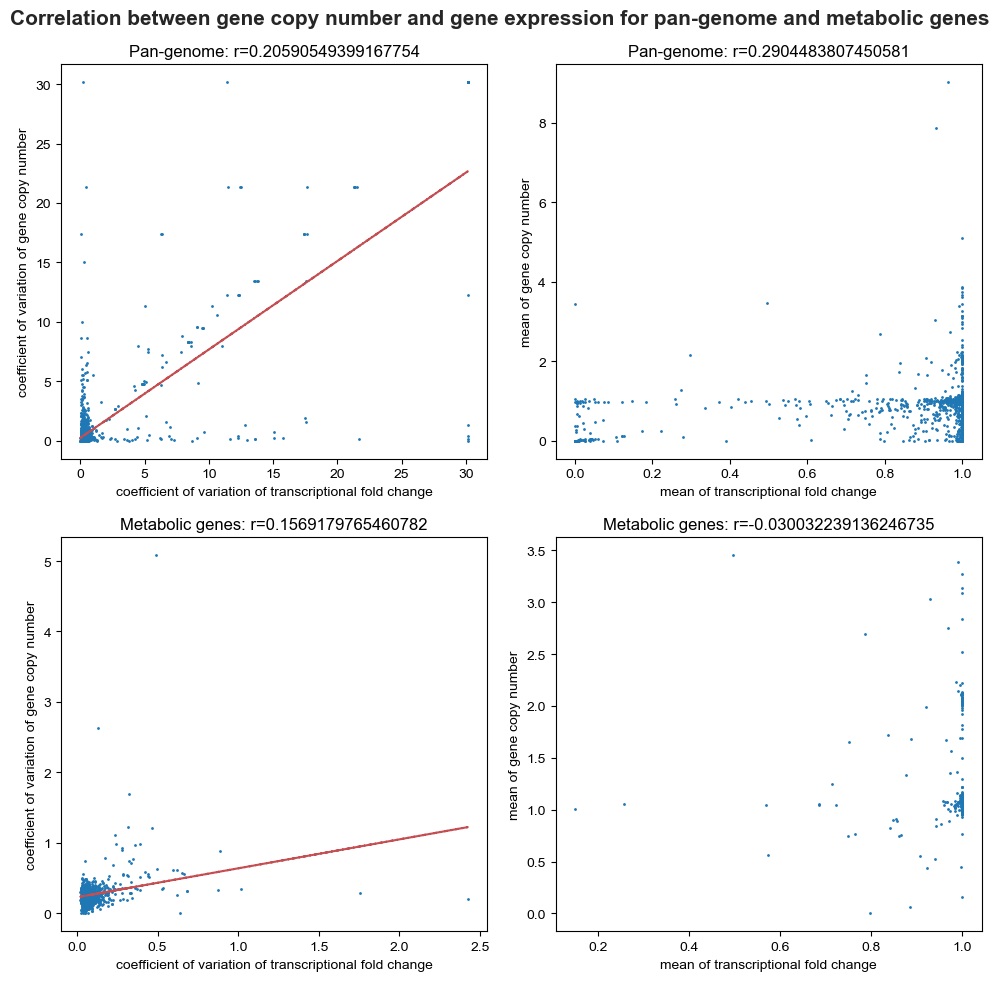

In [60]:
# calculate the pearson correlation coefficient to compare pan-genome and metabolic genes
from scipy.stats import pearsonr,spearmanr
r_cv_fc_cnv=spearmanr(cv_expression_fc,cv_cnv)
r_mean_fc_cnv=spearmanr(mean_expression,mean_cnv)
r_met_cv_fc_cnv=spearmanr(cv_expression_fc_met,cv_cnv_met)
r_met_mean_fc_cnv=spearmanr(mean_expression_fc_met,mean_cnv_met)

# plot the scatter plot for cv_fc&cv_cnv, mean_fc&mean_cnv ,calculate the correlation coefficient, and show the density of point on the plot , and add the linear regression line for each plot
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.set()
ax[0,0].scatter(cv_expression_fc,cv_cnv,s=1)
# add the density of points and colorbar
# sns.kdeplot(cv_fc,cv_cnv,ax=ax[0,0],cmap='Reds',shade=True,shade_lowest=False,cbar=True,cbar_kws={'label':'density of genes','shrink':0.5,'aspect':10})
# add the linear regression line
z = np.polyfit(cv_expression_fc,cv_cnv, 1)
p = np.poly1d(z)
ax[0,0].plot(cv_expression_fc,p(cv_expression_fc),"r--")
ax[0,0].set_xlabel('coefficient of variation of transcriptional fold change')
ax[0,0].set_ylabel('coefficient of variation of gene copy number')
ax[0,0].set_title('Pan-genome: r=%s'%r_cv_fc_cnv[0])
ax[0,1].scatter(mean_expression_fc,mean_cnv,s=1)
ax[0,1].set_xlabel('mean of transcriptional fold change')
ax[0,1].set_ylabel('mean of gene copy number')
ax[0,1].set_title('Pan-genome: r=%s'%r_mean_fc_cnv[0])
ax[1,0].scatter(cv_expression_fc_met,cv_cnv_met,s=1)
# add the density of points and colorbar
# sns.kdeplot(cv_fc_met,cv_cnv_met,ax=ax[1,0],cmap='Reds',shade=True,shade_lowest=False,cbar=True,cbar_kws={'label':'density of genes','shrink':0.5,'aspect':10})
# add the linear regression line
z = np.polyfit(cv_expression_fc_met,cv_cnv_met, 1)
p = np.poly1d(z)
# add the linear regression line with black dash line
ax[1,0].plot(cv_expression_fc_met,p(cv_expression_fc_met),"r--")
ax[1,0].set_xlabel('coefficient of variation of transcriptional fold change')
ax[1,0].set_ylabel('coefficient of variation of gene copy number')
ax[1,0].set_title('Metabolic genes: r=%s'%r_met_cv_fc_cnv[0])
ax[1,1].scatter(mean_expression_fc_met,mean_cnv_met,s=1)
ax[1,1].set_xlabel('mean of transcriptional fold change')
ax[1,1].set_ylabel('mean of gene copy number')
ax[1,1].set_title('Metabolic genes: r=%s'%r_met_mean_fc_cnv[0])
fig.suptitle('Correlation between gene copy number and gene expression for pan-genome and metabolic genes',fontsize=15,weight='bold')
plt.tight_layout()
plt.show()

d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\softwares\programming\anoconda\envs\why\lib\site-packages\seaborn\dis

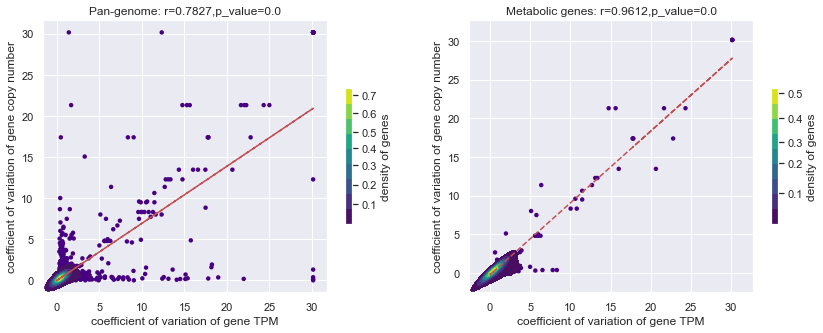

In [9]:
# calculate the pearson correlation coefficient to compare pan-genome and metabolic genes
from scipy.stats import pearsonr,spearmanr
r_cv_expression_cnv=pearsonr(cv_expression,cv_cnv)
r_cv_expression_cnv_met=pearsonr(cv_expression_met,cv_cnv_met)

# plot scatter plot to compare the correlation coefficient of expression with CNV for pan-genome and metabolic genes
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.set()
# set the colorbar parameters,range:0-1, and set the xticks
cbar_paras={'label':'density of genes','shrink':0.5,'ticks':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}
# set the colorbar parameters,range:0-1, and set the xticks
ax[0].scatter(cv_expression,cv_cnv,s=20,c='#480082',marker='o',edgecolors='none',linewidths=0.1,zorder=1)
# add the density of points and colorbar
sns.kdeplot(cv_expression,cv_cnv,ax=ax[0],cmap='viridis',shade=True,shade_lowest=False,cbar=True,cbar_kws=cbar_paras,zorder=2)
# add the linear regression line
z = np.polyfit(cv_expression,cv_cnv, 1)
p = np.poly1d(z)
# add the linear regression line with black dash line
ax[0].plot(cv_expression,p(cv_expression),"r--")
ax[0].set_xlabel('coefficient of variation of gene expression')
ax[0].set_ylabel('coefficient of variation of gene copy number')
ax[0].set_title('Pan-genome: r=%.4f,p_value=%s'%(r_cv_expression_cnv[0],r_cv_expression_cnv[1]))
ax[1].scatter(cv_expression_met,cv_cnv_met,s=20,c='#480082',marker='o',edgecolors='none',linewidths=0.1,zorder=1)
# add the density of points and colorbar
sns.kdeplot(cv_expression_met,cv_cnv_met,ax=ax[1],cmap='viridis',shade=True,shade_lowest=False,cbar=True,cbar_kws=cbar_paras,zorder=2)
# add the linear regression line
z = np.polyfit(cv_expression_met,cv_cnv_met, 1)
p = np.poly1d(z)
ax[1].plot(cv_expression_met,p(cv_expression_met),"r--",zorder=3)
ax[1].set_xlabel('coefficient of variation of gene expression')
ax[1].set_ylabel('coefficient of variation of gene copy number')
ax[1].set_title('Metabolic genes: r=%.4f,p_value=%s'%(r_cv_expression_cnv_met[0],r_cv_expression_cnv_met[1]))
plt.show()

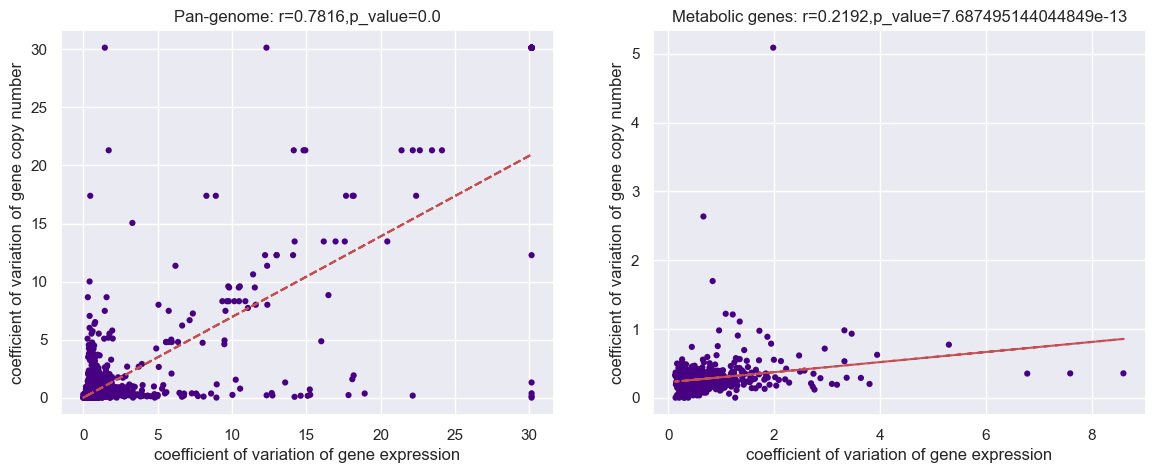

In [63]:
# calculate the pearson correlation coefficient to compare pan-genome and metabolic genes
from scipy.stats import pearsonr,spearmanr
r_cv_expression_cnv=pearsonr(cv_expression,cv_cnv)
r_cv_expression_cnv_met=pearsonr(cv_expression_met,cv_cnv_met)

# plot scatter plot to compare the correlation coefficient of expression with CNV for pan-genome and metabolic genes
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.set()
# set the colorbar parameters,range:0-1, and set the xticks
cbar_paras={'label':'density of genes','shrink':0.5,'ticks':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}
# set the colorbar parameters,range:0-1, and set the xticks
ax[0].scatter(cv_expression,cv_cnv,s=20,c='#480082',marker='o',edgecolors='none',linewidths=0.1,zorder=1)
# add the density of points and colorbar
# sns.kdeplot(cv_expression,cv_cnv,ax=ax[0],cmap='viridis',shade=True,shade_lowest=False,cbar=True,cbar_kws=cbar_paras,zorder=2)
# add the linear regression line
z = np.polyfit(cv_expression,cv_cnv, 1)
p = np.poly1d(z)
# add the linear regression line with black dash line
ax[0].plot(cv_expression,p(cv_expression),"r--")
ax[0].set_xlabel('coefficient of variation of gene expression')
ax[0].set_ylabel('coefficient of variation of gene copy number')
ax[0].set_title('Pan-genome: r=%.4f,p_value=%s'%(r_cv_expression_cnv[0],r_cv_expression_cnv[1]))
ax[1].scatter(cv_expression_met,cv_cnv_met,s=20,c='#480082',marker='o',edgecolors='none',linewidths=0.1,zorder=1)
# add the density of points and colorbar
# sns.kdeplot(cv_expression_met,cv_cnv_met,ax=ax[1],cmap='viridis',shade=True,shade_lowest=False,cbar=True,cbar_kws=cbar_paras,zorder=2)
# add the linear regression line
z = np.polyfit(cv_expression_met,cv_cnv_met, 1)
p = np.poly1d(z)
ax[1].plot(cv_expression_met,p(cv_expression_met),"r--",zorder=3)
ax[1].set_xlabel('coefficient of variation of gene expression')
ax[1].set_ylabel('coefficient of variation of gene copy number')
ax[1].set_title('Metabolic genes: r=%.4f,p_value=%s'%(r_cv_expression_cnv_met[0],r_cv_expression_cnv_met[1]))
plt.show()

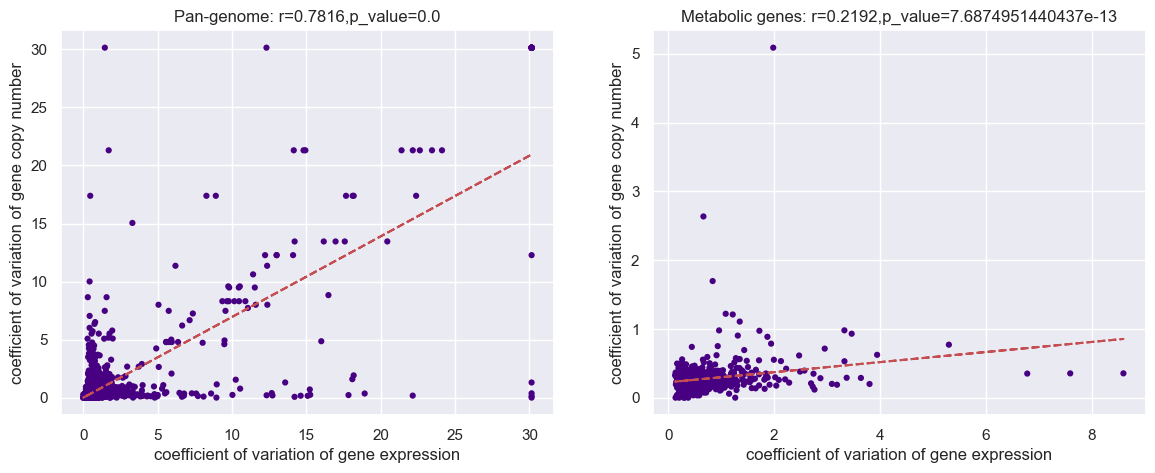

In [10]:
# calculate the pearson correlation coefficient to compare pan-genome and metabolic genes
from scipy.stats import pearsonr
r_cv_expression_cnv=pearsonr(cv_expression,cv_cnv)
r_cv_expression_cnv_met=pearsonr(cv_expression_met,cv_cnv_met)

# plot scatter plot to compare the correlation coefficient of expression with CNV for pan-genome and metabolic genes
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.set()
# set the colorbar parameters,range:0-1, and set the xticks
cbar_paras={'label':'density of genes','shrink':0.5,'ticks':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}
# set the colorbar parameters,range:0-1, and set the xticks
ax[0].scatter(cv_expression,cv_cnv,s=20,c='#480082',marker='o',edgecolors='none',linewidths=0.1,zorder=1)
# add the density of points and colorbar
# sns.kdeplot(cv_expression,cv_cnv,ax=ax[0],cmap='viridis',shade=True,shade_lowest=False,cbar=True,cbar_kws=cbar_paras,zorder=2)
# add the linear regression line
z = np.polyfit(cv_expression,cv_cnv, 1)
p = np.poly1d(z)
# add the linear regression line with black dash line
ax[0].plot(cv_expression,p(cv_expression),"r--")
ax[0].set_xlabel('coefficient of variation of gene expression')
ax[0].set_ylabel('coefficient of variation of gene copy number')
ax[0].set_title('Pan-genome: r=%.4f,p_value=%s'%(r_cv_expression_cnv[0],r_cv_expression_cnv[1]))
ax[1].scatter(cv_expression_met,cv_cnv_met,s=20,c='#480082',marker='o',edgecolors='none',linewidths=0.1,zorder=1)
# add the density of points and colorbar
# sns.kdeplot(cv_expression_met,cv_cnv_met,ax=ax[1],cmap='viridis',shade=True,shade_lowest=False,cbar=True,cbar_kws=cbar_paras,zorder=2)
# add the linear regression line
z = np.polyfit(cv_expression_met,cv_cnv_met, 1)
p = np.poly1d(z)
ax[1].plot(cv_expression_met,p(cv_expression_met),"r--",zorder=3)
ax[1].set_xlabel('coefficient of variation of gene expression')
ax[1].set_ylabel('coefficient of variation of gene copy number')
ax[1].set_title('Metabolic genes: r=%.4f,p_value=%s'%(r_cv_expression_cnv_met[0],r_cv_expression_cnv_met[1]))
plt.show()

In [11]:
# save cv_expression ,cv_cnv ,cv_expression_met ,cv_cnv_met
cv_expression.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/cv_expression.csv')
cv_cnv.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/cv_cnv.csv')
cv_expression_met.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/cv_expression_met.csv')
cv_cnv_met.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/cv_cnv_met.csv')

- conclusion:在 gene family level, 基因拷贝数变异程度同转录水平表达程度高度相关。
1. 代谢相关基因的表达变化与基因拷贝数变化的相关性更强。
2. 代谢相关基因在菌株层面，其转录水平的表达差异同拷贝数变化差异有着直接很强的相关性(r=0.98)，说明转录水平差异主要由拷贝数变化导致。(discussion: 根据拷贝数变化预测基因表达水平:深度学习: input:拷贝数信息+reference transcriptional abundance)

In [11]:
# transform 2 dimension data to 1 dimension data for expressionMatrix and cnvMatrix
expressionMatrix_1d=expressionMatrix.stack().reset_index()
expressionMatrix_1d.columns=['gene','sample','expression']
cnvMatrix_1d=cnvMatrix.stack().reset_index()
cnvMatrix_1d.columns=['gene','sample','cnv']
fcMatrix_1d=fcMatrix.stack().reset_index()
fcMatrix_1d.columns=['gene','sample','fc']
cnv_metMatrix_1d=cnv_metMatrix.stack().reset_index()
cnv_metMatrix_1d.columns=['gene','sample','cnv']
fc_metMatrix_1d=fc_metMatrix.stack().reset_index()
fc_metMatrix_1d.columns=['gene','sample','fc']
expression_metMatrix_1d=expression_metMatrix.stack().reset_index()
expression_metMatrix_1d.columns=['gene','sample','expression']

NameError: name 'fcMatrix' is not defined

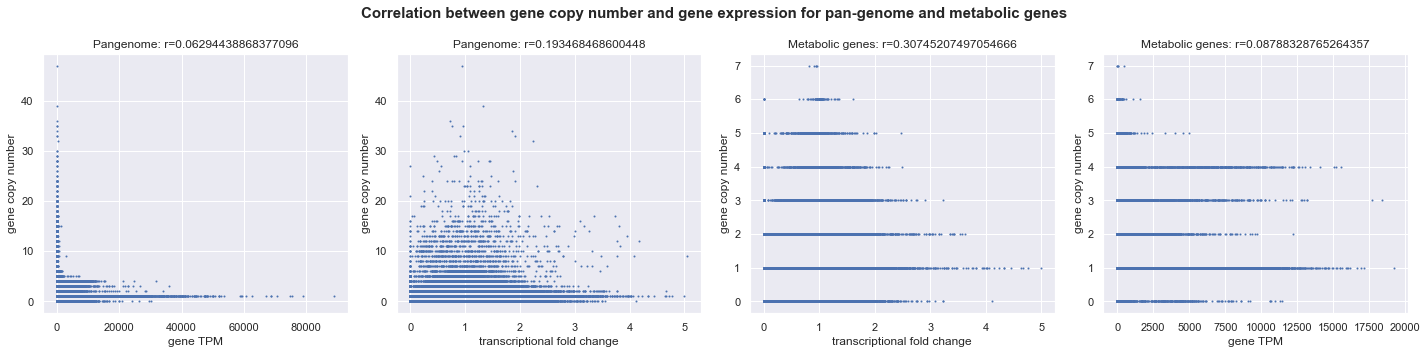

In [13]:
# calculate the pearson correlation coefficient
r_expression_cnv=pearsonr(expressionMatrix_1d['expression'],cnvMatrix_1d['cnv'])
r_fc_cnv=pearsonr(fcMatrix_1d['fc'],cnvMatrix_1d['cnv'])
r_met_fc_cnv=pearsonr(fc_metMatrix_1d['fc'],cnv_metMatrix_1d['cnv'])
r_met_expression_cnv=pearsonr(expression_metMatrix_1d['expression'],cnv_metMatrix_1d['cnv'])

# plot the scatter plot for expression&cnv, fc&cnv ,calculate the correlation coefficient
fig,ax=plt.subplots(1,4,figsize=(20,5))
sns.set()
ax[0].scatter(expressionMatrix_1d['expression'],cnvMatrix_1d['cnv'],s=1)
ax[0].set_xlabel('gene expression')
ax[0].set_ylabel('gene copy number')
ax[0].set_title('Pangenome: r=%s'%r_expression_cnv[0])
ax[1].scatter(fcMatrix_1d['fc'],cnvMatrix_1d['cnv'],s=1)
ax[1].set_xlabel('transcriptional fold change')
ax[1].set_ylabel('gene copy number')
ax[1].set_title('Pangenome: r=%s'%r_fc_cnv[0])
ax[2].scatter(fc_metMatrix_1d['fc'],cnv_metMatrix_1d['cnv'],s=1)
ax[2].set_xlabel('transcriptional fold change')
ax[2].set_ylabel('gene copy number')
ax[2].set_title('Metabolic genes: r=%s'%r_met_fc_cnv[0])
ax[3].scatter(expression_metMatrix_1d['expression'],cnv_metMatrix_1d['cnv'],s=1)
ax[3].set_xlabel('gene expression')
ax[3].set_ylabel('gene copy number')
ax[3].set_title('Metabolic genes: r=%s'%r_met_expression_cnv[0])
fig.suptitle('Correlation between gene copy number and gene expression for pan-genome and metabolic genes',fontsize=15,weight='bold')
plt.tight_layout()
plt.show()

- conclusion: 在 single gene level, 基因拷贝数差异同转录水平差异没有强相关性，可能不同基因家族，单个拷贝数对基因表达水平的贡献度是不同的（同启动子，终止子强弱有关），因此无法从整体探究基因拷贝数对转录水平影响的定量关系。

#### 2.calculate the correlation between transcription and flux at reaction level

In [12]:
#load data
rxn_expressionMatrix=pd.read_csv(r'code\6.transcriptomics_ssGEMs_analysis\output\sce969_rxn_expressionMatrix_normalized.csv',index_col=0)
# rxn_expressionMatrix=pd.read_csv(r'code\6.transcriptomics_ssGEMs_analysis\output\sce969_rxn_tpmMatrix.csv',index_col=0)
rxn_cnvMatrix=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/sce1800_rxn_cnvMatrix.csv',index_col=0)
# fluxMatrix=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/fix_growth_gimme_pfba_fluxes.csv',index_col=0)
fluxMatrix=pd.read_csv(r'code/6.transcriptomics_ssGEMs_analysis/output/fix_growth_gimme_fba_fluxes.csv',index_col=0)
# remove the columns with 0 value in growth rate(r_2111)
fluxMatrix=fluxMatrix.loc[:,fluxMatrix.loc['r_2111',:]>0]
# fill the NaN value with 0
fluxMatrix=fluxMatrix.fillna(0)

# transferm to absolute value of flux
fluxMatrix=fluxMatrix.applymap(lambda x:abs(x))
fluxMatrix

,AAB_6.re,AAD_6.re,AAE_6.re,AAG_6.re,AAH_6.re,AAI_6.re,AAK_6.re,AAL_3.re,AAM_3.re,AAQ_3.re,...,YCV.re,YDB.re,YDC.re,YDD.re,YDE.re,YDF.re,YDH.re,YDI.re,YDJ.re,YDK.re
r_0001,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
r_0002,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
r_0003,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
r_0004,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
r_0005,0.141797,0.063966,0.071449,0.10824,0.262637,0.116619,0.099426,0.234012,0.07566,0.054508,...,0.224339,0.118805,0.068192,0.087336,0.115678,0.133077,0.265026,0.0846,0.108304,0.085852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r_4678,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
r_4701,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
r_4702,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
r_4703,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000


In [13]:
def flux_to_foldchange(fluxMatrix):
    # reference: mean value for rows
    df_expression_mean=fluxMatrix.apply(lambda x: x[x!=0].mean(),axis=1)
    df_expression_foldchange=fluxMatrix.apply(lambda x: x/df_expression_mean,axis=0)
    # fill inf as 10, and nan as 0
    df_expression_foldchange.replace([np.inf, -np.inf], 10,inplace=True)
    df_expression_foldchange.fillna(0,inplace=True)
    return df_expression_foldchange

In [14]:
# calculate relative foldchange of transcriptional level
rxn_fcMatrix=count_to_foldchange(rxn_expressionMatrix)
# rxn_fcMatrix=flux_to_foldchange(rxn_expressionMatrix)

# calculate relative foldchange of flux
flux_fcMatrix=flux_to_foldchange(fluxMatrix)
flux_fcMatrix

,AAB_6.re,AAD_6.re,AAE_6.re,AAG_6.re,AAH_6.re,AAI_6.re,AAK_6.re,AAL_3.re,AAM_3.re,AAQ_3.re,...,YCV.re,YDB.re,YDC.re,YDD.re,YDE.re,YDF.re,YDH.re,YDI.re,YDJ.re,YDK.re
r_0001,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
r_0002,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
r_0003,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
r_0004,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
r_0005,1.42812,0.644241,0.719604,1.09015,2.645174,1.174536,1.001376,2.356877,0.762014,0.548983,...,2.259451,1.196556,0.686801,0.879613,1.165062,1.340299,2.669235,0.852053,1.0908,0.864669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r_4678,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
r_4701,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
r_4702,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
r_4703,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000


In [15]:
# remove columns with 0 in growth
# pfba_fluxMatrix=pfba_fluxMatrix.loc[:,pfba_fluxMatrix.loc['growth']>0]
# remove .xml in column names
flux_fcMatrix.columns=[i.strip('.xml') for i in flux_fcMatrix.columns]
# remove .fa in rxn_cnvMatrix column names
rxn_cnvMatrix.columns=[i.strip('.fa') for i in rxn_cnvMatrix.columns]

commonRxnLis=list(set(rxn_expressionMatrix.index)&set(rxn_cnvMatrix.index)&set(flux_fcMatrix.index))
commnonSamples=list(set(rxn_expressionMatrix.columns)&set(rxn_cnvMatrix.columns)&set(flux_fcMatrix.columns))
rxn_expressionMatrix=rxn_expressionMatrix.loc[commonRxnLis,commnonSamples]
rxn_cnvMatrix=rxn_cnvMatrix.loc[commonRxnLis,commnonSamples]
flux_fcMatrix=flux_fcMatrix.loc[commonRxnLis,commnonSamples]
rxn_fcMatrix=rxn_fcMatrix.loc[commonRxnLis,commnonSamples]

In [16]:
mean_flux=flux_fcMatrix.mean(axis=1)
mean_expression=rxn_expressionMatrix.mean(axis=1)
mean_cnv=rxn_cnvMatrix.mean(axis=1)
mean_fc=rxn_fcMatrix.mean(axis=1)
cv_flux=flux_fcMatrix.std(axis=1)/flux_fcMatrix.mean(axis=1)
cv_expression=rxn_expressionMatrix.std(axis=1)/rxn_expressionMatrix.mean(axis=1)
cv_cnv=rxn_cnvMatrix.std(axis=1)/rxn_cnvMatrix.mean(axis=1)
cv_fc=rxn_fcMatrix.std(axis=1)/rxn_fcMatrix.mean(axis=1)

# fill nan with 0
mean_flux=mean_flux.fillna(0)
mean_expression=mean_expression.fillna(0)
mean_cnv=mean_cnv.fillna(0)
mean_fc=mean_fc.fillna(0)
cv_flux=cv_flux.fillna(0)
cv_expression=cv_expression.fillna(0)
cv_cnv=cv_cnv.fillna(0)
cv_fc=cv_fc.fillna(0)

# remove index which with 1 value in mean_fc and mean_cnv
for rxn in mean_fc.index:
    if mean_cnv[rxn]==1 or mean_fc[rxn]==1:
        mean_fc=mean_fc.drop(rxn)
        mean_cnv=mean_cnv.drop(rxn)
        mean_flux=mean_flux.drop(rxn)
        mean_expression=mean_expression.drop(rxn)
        cv_fc=cv_fc.drop(rxn)
        cv_cnv=cv_cnv.drop(rxn)
        cv_flux=cv_flux.drop(rxn)
        cv_expression=cv_expression.drop(rxn)

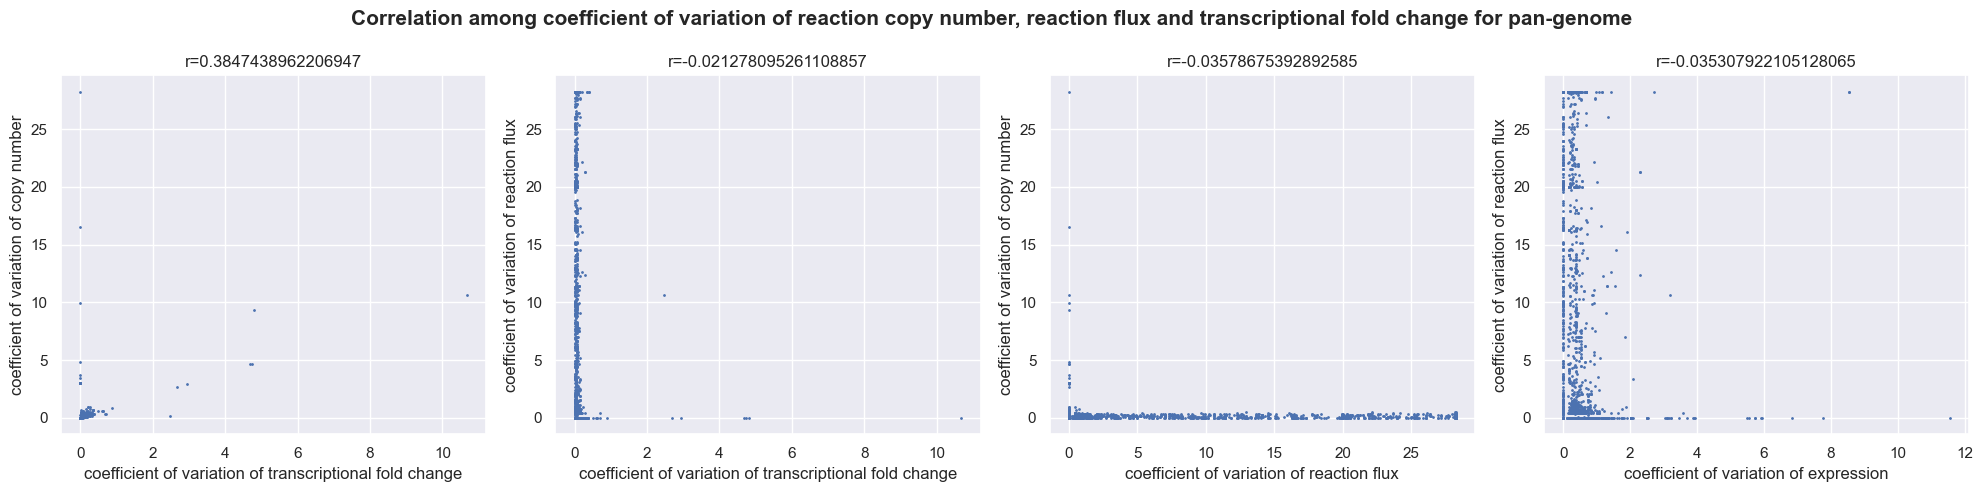

In [17]:
from scipy.stats import pearsonr
# calculate the pearson correlation coefficient
r_cv_fc_cnv=pearsonr(cv_fc,cv_cnv)
r_cv_fc_flux=pearsonr(cv_fc,cv_flux)
r_cv_flux_cnv=pearsonr(cv_flux,cv_cnv)
r_cv_expression_flux=pearsonr(cv_expression,cv_flux)


# plot the scatter plot for cv fc&cnv, cv fc&flux, cv expression&flux, cv flux&cnv
fig,ax=plt.subplots(1,4,figsize=(20,5))
sns.set()
ax[0].scatter(cv_fc,cv_cnv,s=1)
ax[0].set_xlabel('coefficient of variation of transcriptional fold change')
ax[0].set_ylabel('coefficient of variation of copy number')
ax[0].set_title('r=%s'%r_cv_fc_cnv[0])
ax[1].scatter(cv_fc,cv_flux,s=1)
ax[1].set_xlabel('coefficient of variation of transcriptional fold change')
ax[1].set_ylabel('coefficient of variation of reaction flux')
ax[1].set_title('r=%s'%r_cv_fc_flux[0])
ax[2].scatter(cv_flux,cv_cnv,s=1)
ax[2].set_xlabel('coefficient of variation of reaction flux')
ax[2].set_ylabel('coefficient of variation of copy number')
ax[2].set_title('r=%s'%r_cv_flux_cnv[0])
ax[3].scatter(cv_expression,cv_flux,s=1)
ax[3].set_xlabel('coefficient of variation of expression')
ax[3].set_ylabel('coefficient of variation of reaction flux')
ax[3].set_title('r=%s'%r_cv_expression_flux[0])
fig.suptitle('Correlation among coefficient of variation of reaction copy number, reaction flux and transcriptional fold change for pan-genome',fontsize=15,weight='bold')
plt.tight_layout()
plt.show()

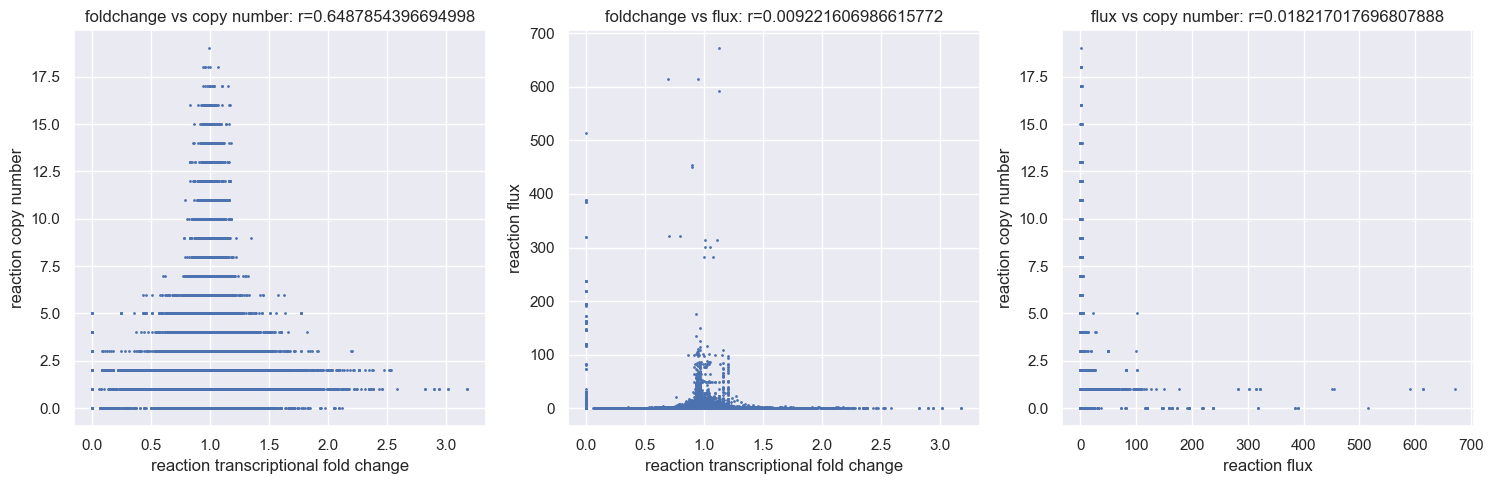

In [18]:
# transform 2 dimension data to 1 dimension data for rxn_fcMatrix, rxn_cnvMatrix, pfba_fluxMatrix
rxn_fcMatrix_1d=rxn_fcMatrix.stack().reset_index()
rxn_fcMatrix_1d.columns=['rxn','strain','fc']
rxn_cnvMatrix_1d=rxn_cnvMatrix.stack().reset_index()
rxn_cnvMatrix_1d.columns=['rxn','strain','cnv']
flux_fcMatrix_1d=flux_fcMatrix.stack().reset_index()
flux_fcMatrix_1d.columns=['rxn','strain','flux']


# calculate the pearson correlation coefficient for rxn_fcMatrix_1d, rxn_cnvMatrix_1d, pfba_fluxMatrix_1d
r_fc_cnv=pearsonr(rxn_fcMatrix_1d['fc'],rxn_cnvMatrix_1d['cnv'])
r_fc_flux=pearsonr(rxn_fcMatrix_1d['fc'],flux_fcMatrix_1d['flux'])
r_flux_cnv=pearsonr(flux_fcMatrix_1d['flux'],rxn_cnvMatrix_1d['cnv'])

# plot the scatter plot for rxn_fcMatrix_1d, rxn_cnvMatrix_1d, pfba_fluxMatrix_1d
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.set()
ax[0].scatter(rxn_fcMatrix_1d['fc'],rxn_cnvMatrix_1d['cnv'],s=1)
ax[0].set_xlabel('reaction transcriptional fold change')
ax[0].set_ylabel('reaction copy number')
ax[0].set_title('foldchange vs copy number: r=%s'%r_fc_cnv[0])
ax[1].scatter(rxn_fcMatrix_1d['fc'],flux_fcMatrix_1d['flux'],s=1)
ax[1].set_xlabel('reaction transcriptional fold change')
ax[1].set_ylabel('reaction flux')
ax[1].set_title('foldchange vs flux: r=%s'%r_fc_flux[0])
ax[2].scatter(flux_fcMatrix_1d['flux'],rxn_cnvMatrix_1d['cnv'],s=1)
ax[2].set_xlabel('reaction flux')
ax[2].set_ylabel('reaction copy number')
ax[2].set_title('flux vs copy number: r=%s'%r_flux_cnv[0])
plt.tight_layout()
plt.show()

In [19]:
# calculate the pearson correlation coefficient of expression and flux for each reaction
# fill nan with 0 for rxn_expressionMatrix, pfba_fluxMatrix
rxn_fcMatrix=rxn_fcMatrix.fillna(1)
flux_fcMatrix=flux_fcMatrix.fillna(1)
# calculate the pearson correlation coefficient for rxn_fcMatrix, fluxMatrix for each reaction, if p value less than 0.05, set it as nan
r_expression_flux=rxn_fcMatrix.apply(lambda x:pearsonr(x,flux_fcMatrix.loc[x.name])[0] if pearsonr(x,flux_fcMatrix.loc[x.name])[1]<0.05 else None,axis=1)
# r_expression_flux=rxn_fcMatrix.apply(lambda x:pearsonr(x,flux_fcMatrix.loc[x.name])[0],axis=1)
# drop nan value
# r_expression_flux=r_expression_flux.dropna()
r_expression_flux.describe()
# print(r_expression_flux[r_expression_flux>0.4].index)

d:\softwares\programming\anoconda\envs\gem\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


count    397.000000
mean       0.043489
std        0.112180
min       -0.398121
25%       -0.082264
50%        0.084804
75%        0.110914
max        0.460879
dtype: float64

In [21]:
# save r_expression_flux
# r_expression_flux.to_csv(r'code/7.transcriptomics_ssGEMs_analysis/output/pearson_expressionfc_fluxfc.csv')

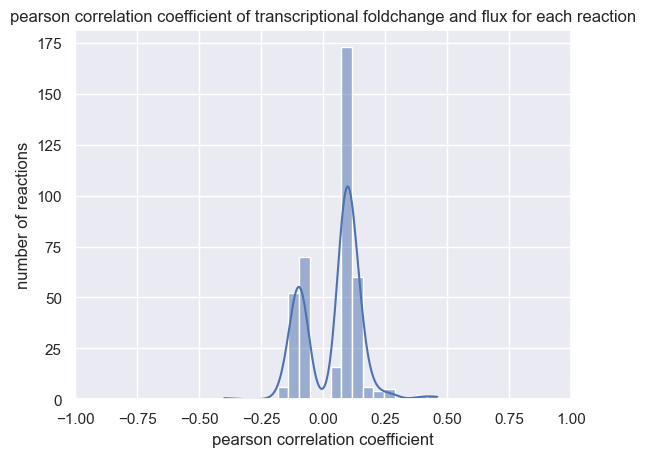

count    397.000000
mean       0.043489
std        0.112180
min       -0.398121
25%       -0.082264
50%        0.084804
75%        0.110914
max        0.460879
dtype: float64

In [20]:
# plot the kde and histogram for r_expression_flux
sns.set()
sns.histplot(r_expression_flux,kde=True,bins=20)
plt.xlabel('pearson correlation coefficient')
plt.ylabel('number of reactions')
plt.title('pearson correlation coefficient of transcriptional foldchange and flux for each reaction')
# set x axis limit
plt.xlim(-1,1)
plt.show()
r_expression_flux.describe()

In [21]:
# check reaction with the abosolute value more than 0.6 
# sort the reaction by the value of pearson correlation coefficient
r_expression_flux=r_expression_flux.sort_values(ascending=False)
rxnList=r_expression_flux[r_expression_flux>0.4].index.tolist()

yeast8_data=pd.read_excel('model/yeast-GEM8.7.xlsx',sheet_name='RXNS')
# set ID as index
yeast8_data=yeast8_data.set_index('ID')

# get the reaction name and gene name for each reaction
for rxnID in rxnList:
    rxnName=yeast8_data.loc[rxnID,'NAME']
    rxnsubsytem=yeast8_data.loc[rxnID,'SUBSYSTEM']
    print('reaction ID: %s, reaction name: %s, reaction subsytem: %s'%(rxnID,rxnName,rxnsubsytem))

df_r_expression_flux=pd.DataFrame(r_expression_flux,columns=['pearson correlation coefficient'])
df_r_expression_flux['rxnName']=df_r_expression_flux.index.map(lambda x:yeast8_data.loc[x,'NAME'] if x in yeast8_data.index else 'None')
df_r_expression_flux['subsystem']=df_r_expression_flux.index.map(lambda x:yeast8_data.loc[x,'SUBSYSTEM'] if x in yeast8_data.index else 'None')
df_r_expression_flux['p_value']=rxn_fcMatrix.apply(lambda x:pearsonr(x,flux_fcMatrix.loc[x.name])[1],axis=1)
df_r_expression_flux
# df_r_expression_flux.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/pearson_expressionfc_fluxfc.csv')

reaction ID: r_2118, reaction name: tryptophan transaminase, reaction subsytem: Phenylalanine, tyrosine and tryptophan biosynthesis
reaction ID: r_0308, reaction name: cystathionine b-lyase, reaction subsytem: Cysteine and methionine metabolism
reaction ID: r_4226, reaction name: L-Alanine:2-oxoglutarate aminotransferase, reaction subsytem: Alanine, aspartate and glutamate metabolism


d:\softwares\programming\anoconda\envs\gem\lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,pearson correlation coefficient,rxnName,subsystem,p_value
r_2118,0.460879,tryptophan transaminase,"Phenylalanine, tyrosine and tryptophan biosynt...",3.260503e-43
r_0308,0.452673,cystathionine b-lyase,Cysteine and methionine metabolism,1.440418e-41
r_4226,0.404404,L-Alanine:2-oxoglutarate aminotransferase,"Alanine, aspartate and glutamate metabolism",9.430090e-33
r_1267,0.393515,sulfite transport,"Transport [c, e]",5.920212e-31
r_0445,0.286195,formate dehydrogenase,Glyoxylate and dicarboxylate metabolism,1.650291e-16
...,...,...,...,...
r_1642,NaN,"adenosine 3',5'-bisphosphate transport","Transport [c, m]",2.510412e-01
r_0076,NaN,5'-nucleotidase (CMP),Nicotinate and nicotinamide metabolism,NaN
r_2601,NaN,"CL (1-16:0, 2-18:1, 3-16:1, 4-18:1) phospholip...",Glycerophospholipid metabolism,NaN
r_4407,NaN,D-O-Phosphoserine phosphohydrolase,"Glycine, serine and threonine metabolism",NaN


#### 3.compare the correlation between flux and transcription

In [99]:
import json
from cobra.io import read_sbml_model

# load data
with open('model/model_pathway_rxndict.json') as f:
    pathway_rxn_dict=json.load(f)

rxnList=r_expression_flux.index.tolist()
# remove rxn that is not in rxnList
for pathway in pathway_rxn_dict.keys():
    pathway_rxn_dict[pathway]=[rxn for rxn in pathway_rxn_dict[pathway] if rxn in rxnList]

##### 3.1 check the average pearson coefficient of different pathway

In [100]:
# transfer the r value to abosolute value
# r_expression_flux=abs(r_expression_flux)
r_expression_flux_glycolysis=r_expression_flux[pathway_rxn_dict['Glycolysis']]
r_expression_flux_tca=r_expression_flux[pathway_rxn_dict['TCA cycle']]
r_expression_flux_ppp=r_expression_flux[pathway_rxn_dict['Pentose phosphate pathway']]
r_expression_flux_op=r_expression_flux[pathway_rxn_dict['Oxidative phosphorylation']]
r_expression_flux_galactose=r_expression_flux[pathway_rxn_dict['Galactose']]
r_expression_flux_aa=r_expression_flux[pathway_rxn_dict['Biosynthesis of amino acids']]
r_expression_flux_secondary=r_expression_flux[pathway_rxn_dict['Biosynthesis of secondary metabolites']]
r_expression_flux_gly_down=r_expression_flux[pathway_rxn_dict['Glycolysis_downstream']]
r_expression_flux_gly_up=r_expression_flux[pathway_rxn_dict['Glycolysis_upstream']]
r_expression_flux_af=r_expression_flux[pathway_rxn_dict['Anaerobic_fermentation']]
r_expression_flux.describe()

count    397.000000
mean       0.043489
std        0.112180
min       -0.398121
25%       -0.082264
50%        0.084804
75%        0.110914
max        0.460879
dtype: float64

c:\Users\miniY\.conda\envs\data\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.3'` for same effect.
  warnings.warn(msg, FutureWarning)
C:\Users\miniY\AppData\Local\Temp\ipykernel_17400\3671398098.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.swarmplot(data=[r_expression_flux.sample(1000),r_expression_flux_glycolysis,r_expression_flux_tca,r_expression_flux_ppp,r_expression_flux_op,r_expression_flux_aa,r_expression_flux_secondary,r_expression_flux_gly_down,r_expression_flux_gly_up,r_expression_flux_af],color='.3',size=5)
c:\Users\miniY\.conda\envs\data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miniY\.conda\envs\data\L

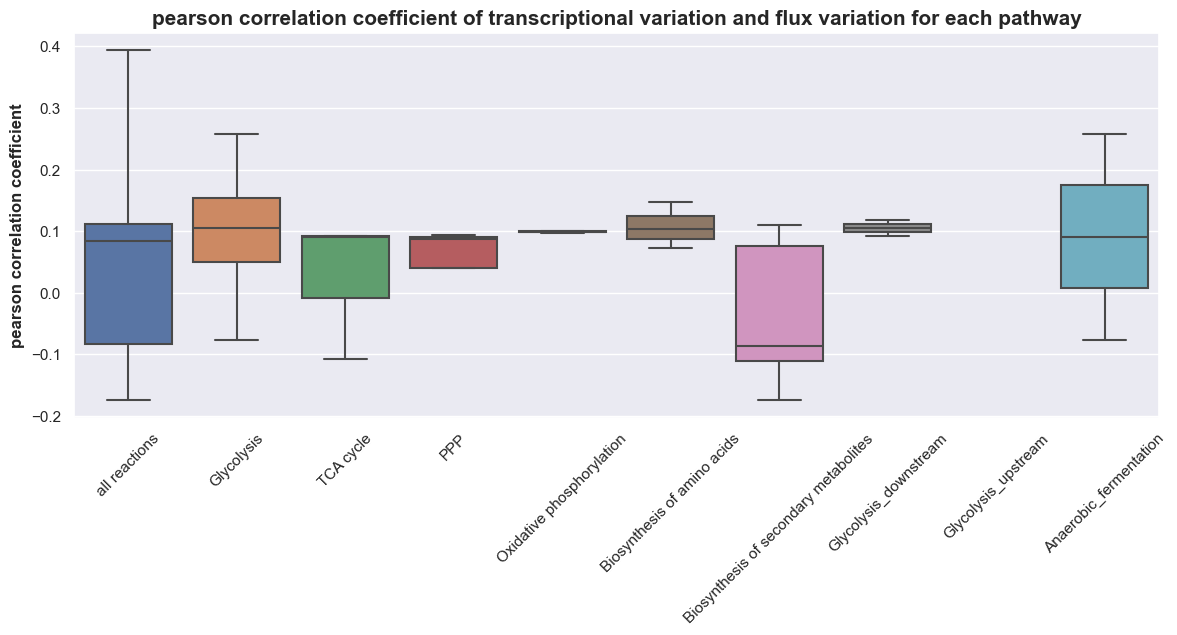

p value for glycolysis: nan
p value for TCA cycle: nan
p value for PPP: nan
p value for oxidative phosphorylation: nan
p value for galactose: nan
p value for amino acids: nan
p value for secondary metabolites: nan
p value for glycolysis downstream: nan
p value for glycolysis upstream: nan
p value for anaerobic fermentation: nan


In [101]:
# plot violin plot to compare the distribution of r_expression_flux abosolute value for each pathway
# transform r_expression_flux to absolute value
sns.set()
fig,ax=plt.subplots(1,1,figsize=(14,5))
# plot boxplot with observations points
sns.boxplot(data=[r_expression_flux,r_expression_flux_glycolysis,r_expression_flux_tca,r_expression_flux_ppp,r_expression_flux_op,r_expression_flux_aa,r_expression_flux_secondary,r_expression_flux_gly_down,r_expression_flux_gly_up,r_expression_flux_af],showfliers=False)
# add observations points
# random sample 100 points from r_expression_flux
sns.swarmplot(data=[r_expression_flux.sample(1000),r_expression_flux_glycolysis,r_expression_flux_tca,r_expression_flux_ppp,r_expression_flux_op,r_expression_flux_aa,r_expression_flux_secondary,r_expression_flux_gly_down,r_expression_flux_gly_up,r_expression_flux_af],color='.3',size=5)
ax.set_xticklabels(['all reactions','Glycolysis','TCA cycle','PPP','Oxidative phosphorylation','Biosynthesis of amino acids','Biosynthesis of secondary metabolites','Glycolysis_downstream','Glycolysis_upstream','Anaerobic_fermentation'],rotation=45)
ax.set_ylabel('pearson correlation coefficient',weight='bold',fontsize=12)
ax.set_title('pearson correlation coefficient of transcriptional variation and flux variation for each pathway',fontsize=15,fontweight='bold')
plt.show()

# calculate the p value for each pathway compared to all reactions
from scipy.stats import ttest_ind
p_expression_flux_glycolysis=ttest_ind(r_expression_flux,r_expression_flux_glycolysis)[1]
p_expression_flux_tca=ttest_ind(r_expression_flux,r_expression_flux_tca)[1]
p_expression_flux_ppp=ttest_ind(r_expression_flux,r_expression_flux_ppp)[1]
p_expression_flux_op=ttest_ind(r_expression_flux,r_expression_flux_op)[1]
p_expression_flux_galactose=ttest_ind(r_expression_flux,r_expression_flux_galactose)[1]
p_expression_flux_aa=ttest_ind(r_expression_flux,r_expression_flux_aa)[1]
p_expression_flux_secondary=ttest_ind(r_expression_flux,r_expression_flux_secondary)[1]
p_expression_flux_gly_down=ttest_ind(r_expression_flux,r_expression_flux_gly_down)[1]
p_expression_flux_gly_up=ttest_ind(r_expression_flux,r_expression_flux_gly_up)[1]
p_expression_flux_af=ttest_ind(r_expression_flux,r_expression_flux_af)[1]

print('p value for glycolysis: %s'%p_expression_flux_glycolysis)
print('p value for TCA cycle: %s'%p_expression_flux_tca)
print('p value for PPP: %s'%p_expression_flux_ppp)
print('p value for oxidative phosphorylation: %s'%p_expression_flux_op)
print('p value for galactose: %s'%p_expression_flux_galactose)
print('p value for amino acids: %s'%p_expression_flux_aa)
print('p value for secondary metabolites: %s'%p_expression_flux_secondary)
print('p value for glycolysis downstream: %s'%p_expression_flux_gly_down)
print('p value for glycolysis upstream: %s'%p_expression_flux_gly_up)
print('p value for anaerobic fermentation: %s'%p_expression_flux_af)

- conclusion:
Oxodative phosphorylation and TCA cycle and Biosynthesis of amino acids show a higher correlation for the expression and flux

#### 4.Compare different clades' correlation between flux and transcription

In [102]:
# load all strain info
df_strain_info=pd.read_excel(r'data\1897_strains_info.xlsx',index_col=0)

# remove rows with NaN value in nature_clade
df_strain_info=df_strain_info[~df_strain_info['nature_clade'].isna()]

# only keep strain that exist in rxn_fcMatrix columns
df_strain_info=df_strain_info.loc[df_strain_info.index.isin(rxn_fcMatrix.columns)]
df_strain_info['nature_clade'].value_counts()

nature_clade
1. Wine/European                 234
M3. Mosaic region 3               72
25. Sake                          41
1. Wine/European (subclade 4)     35
26. Asian fermentation            34
3. Brazilian bioethanol           33
8. Mixed origin                   30
10. French Guiana human           28
13. African palm wine             21
1. Wine/European (subclade 3)     20
5. French dairy                   17
1. Wine/European (subclade 1)     17
M2. Mosaic region 2               17
7. Mosaic beer                    15
23. North American oak            13
M3. Mosaic region 3               13
2. Alpechin                       13
12. West African cocoa            12
6. African beer                   10
24. Asian islands                 10
M1. Mosaic region 1               10
18. Far East Asia                  8
4. Mediterranean oak               8
21. Ecuadorean                     8
1. Wine/European (subclade 2)      7
9. Mexican agave                   5
19. Malaysian            

In [103]:
# # Filter by ecological niche 
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='1. Wine/European ')&(df_strain_info['sub_type']!='Wine'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='25. Sake ')&(df_strain_info['sub_type']!='Sake'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='1. Wine/European (subclade 4) ')&(df_strain_info['sub_type']!='Wine'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='3. Brazilian bioethanol ')&(df_strain_info['sub_type']!='Bioethanol'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='13. African palm wine ')&(df_strain_info['sub_type']!='Wine'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='10. French Guiana human ')&(df_strain_info['sub_type']!='Human'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='1. Wine/European (subclade 3) ')&(df_strain_info['sub_type']!='Wine'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='5. French dairy ')&(df_strain_info['sub_type']!='Dairy'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='1. Wine/European (subclade 1) ')&(df_strain_info['sub_type']!='Wine'))]
df_strain_info=df_strain_info[~((df_strain_info['nature_clade']=='7. Mosaic beer ')&(df_strain_info['sub_type']!='Beer'))]

In [104]:
wildtypelist=['14. CHNIII ','20. CHN V ', '15. CHNII ','17. Taiwanese ', '24. Asian islands ', '18. Far East Asia ', '19. Malaysian ', '22. Far East Russian ']
# only keep clades with more than 10 strains
check_cladelist=df_strain_info['nature_clade'].value_counts()[df_strain_info['nature_clade'].value_counts()>10].index.tolist()
wt_strainlist=df_strain_info[df_strain_info['nature_clade'].isin(wildtypelist)].index.tolist()
check_clades_dict=dict()
# sample 20 strains from wildtype
random.seed(123)
wt_strainlist=random.sample(wt_strainlist,20)
check_clades_dict['wildtype']=wt_strainlist
print('wildtype',len(set(wt_strainlist)))
for clade in check_cladelist:
    strainlist=df_strain_info[df_strain_info['nature_clade']==clade].index.tolist()
    if len(strainlist)<15:
        continue
    else:
        # sample 20 strains from each clade
        random.seed(123)
        strainlist=random.sample(strainlist,15)
    check_clades_dict[clade]=strainlist
    print(clade,len(set(strainlist)))

wildtype 20
1. Wine/European  15
M3. Mosaic region 3 15
25. Sake  15
1. Wine/European (subclade 4) 15
26. Asian fermentation  15
8. Mixed origin  15
3. Brazilian bioethanol  15
10. French Guiana human  15
1. Wine/European (subclade 3) 15
13. African palm wine  15
1. Wine/European (subclade 1) 15
M2. Mosaic region 2 15
5. French dairy  15


In [105]:
def calculate_clade_corr_expression_flux(clade_strainlist,rxn_fcMatrix,rxn_fluxMatrix):
    clade_rxn_fcMatrix=rxn_fcMatrix[clade_strainlist]
    clade_rxn_fluxMatrix=rxn_fluxMatrix[clade_strainlist]
    # calculate the pearson correlation coefficient for rxn_fcMatrix, pfba_fluxMatrix for each reaction ,if p value more than 0.05, set r value to 0
    clade_r_expression_flux=clade_rxn_fcMatrix.apply(lambda x:pearsonr(x,clade_rxn_fluxMatrix.loc[x.name])[0] if pearsonr(x,clade_rxn_fluxMatrix.loc[x.name])[1]<0.05 else None,axis=1)
    # clade_r_expression_flux=clade_rxn_fcMatrix.apply(lambda x:pearsonr(x,clade_rxn_fluxMatrix.loc[x.name])[0],axis=1)
    # fill nan with 0
    clade_r_expression_flux=clade_r_expression_flux.fillna(0)

    return clade_r_expression_flux

In [107]:
df_clades_corr_expression_flux=pd.DataFrame(index=rxn_fcMatrix.index)
wt_r_expression_flux=calculate_clade_corr_expression_flux(wt_strainlist,rxn_fcMatrix,fluxMatrix)
df_clades_corr_expression_flux['wildtype']=wt_r_expression_flux
for clade in check_clades_dict.keys():
    strainlist=check_clades_dict[clade]
    clade_r_expression_flux=calculate_clade_corr_expression_flux(strainlist,rxn_fcMatrix,fluxMatrix)
    df_clades_corr_expression_flux[clade]=clade_r_expression_flux

# remove rows with all 0 value
df_clades_corr_expression_flux=df_clades_corr_expression_flux.loc[~(df_clades_corr_expression_flux<=0.05).all(axis=1)]

# only keep rows with any value > 0.5
df_clades_corr_expression_flux=df_clades_corr_expression_flux.loc[(df_clades_corr_expression_flux>0.5).any(axis=1)]
df_clades_corr_expression_flux

c:\Users\miniY\.conda\envs\data\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\miniY\.conda\envs\data\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\miniY\.conda\envs\data\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\miniY\.conda\envs\data\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\miniY\.conda\envs\data\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: A

,wildtype,1. Wine/European,M3. Mosaic region 3,25. Sake,1. Wine/European (subclade 4),26. Asian fermentation,8. Mixed origin,3. Brazilian bioethanol,10. French Guiana human,1. Wine/European (subclade 3),13. African palm wine,1. Wine/European (subclade 1),M2. Mosaic region 2,5. French dairy
r_2399,0.000000,0.000000,0.571189,0.0,0.0,0.000000,0.000000,0.0,0.0,0.733367,0.000000,0.000000,0.000000,0.0
r_0330,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-0.579815,0.0,0.0,0.000000,0.629606,0.000000,0.000000,0.0
r_4592,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.556050,0.000000,0.0
r_2925,0.000000,0.000000,0.000000,0.0,0.0,-0.581205,0.000000,0.0,0.0,0.000000,0.557074,0.000000,0.772993,0.0
r_0891,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.543585,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
r_2934,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.532298,0.000000,0.000000,0.0
r_2799,0.687889,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
r_0346,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.602546,0.000000,0.000000,0.000000,0.0
r_0729,0.000000,-0.544695,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.587281,0.000000,0.0


In [56]:
# save result
df_clades_corr_expression_flux.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/df_clades_pearson_expression_flux.csv')

1. Wine/European  7.721996552632325e-05
M3. Mosaic region 3 0.0007960312011306496
25. Sake  0.00517936773271501
1. Wine/European (subclade 4) 0.002569913308272916
26. Asian fermentation  0.01318731771736944
8. Mixed origin  8.973868873336557e-06
3. Brazilian bioethanol  0.08442773291668224
10. French Guiana human  0.0723549321511116
1. Wine/European (subclade 3) 0.2080306480760521
13. African palm wine  0.00012383792338383656
1. Wine/European (subclade 1) 0.48611471498500614
M2. Mosaic region 2 0.00022105840022228858
5. French dairy  0.008447673551627087


c:\Users\miniY\.conda\envs\data\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miniY\.conda\envs\data\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miniY\.conda\envs\data\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miniY\.conda\envs\data\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

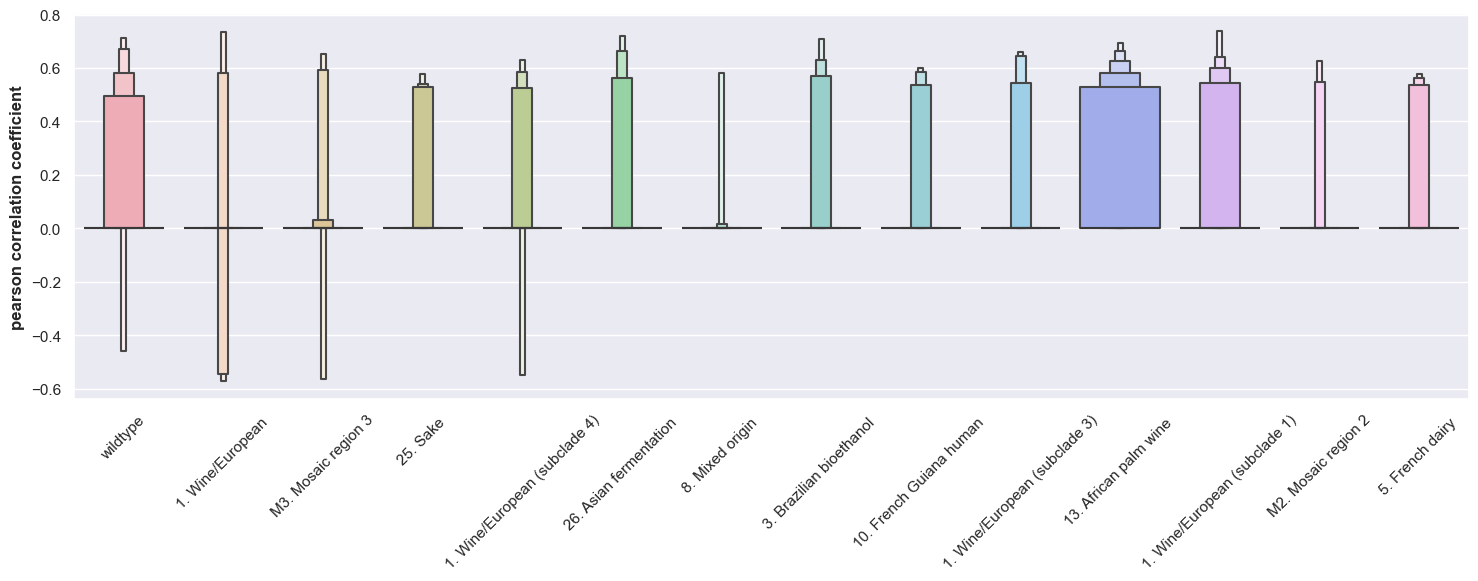

In [108]:
# calculate each columns p value compared to the first column
from scipy.stats import ttest_ind
for clade in df_clades_corr_expression_flux.columns[1:]:
    print(clade,ttest_ind(df_clades_corr_expression_flux['wildtype'],df_clades_corr_expression_flux[clade])[1])

# plot boxplot to compare the distribution of r_expression_flux abosolute value for each clade
sns.set()
fig,ax=plt.subplots(1,1,figsize=(18,5))
# plot violinplot with absolute value
sns.boxenplot(data=df_clades_corr_expression_flux,ax=ax,showfliers=False)
# rotate x axis label
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# set y axis label
ax.set_ylabel('pearson correlation coefficient',weight='bold',fontsize=12)
plt.show()

##### 4.1 pathway flux-transcription correlation comparison for different clades

In [109]:
def calculate_pathway_tmp_flux_corr(pathway_rxn_dict,df_corr_expression_flux):
    df_pathway_mean_corr=pd.Series()
    for pathway,rxnlist in pathway_rxn_dict.items():
        rxnlist=[rxn for rxn in rxnlist if rxn in df_corr_expression_flux.index.tolist()]
        if len(rxnlist)<3:
            continue
        df_pathway_corr_expression_flux=df_corr_expression_flux[rxnlist]

        # use the mean of r value as the pathway r value
        mean_corr=df_pathway_corr_expression_flux.mean()
        df_pathway_mean_corr[pathway]=mean_corr

        # use the max of r value as the pathway r value
        # max_corr=df_pathway_corr_expression_flux.max()
        # df_pathway_mean_corr[pathway]=max_corr

    return df_pathway_mean_corr


In [110]:
# load pathway rxn dict
df_yeast8=pd.read_excel('model/yeast-GEM8.7.xlsx',sheet_name='RXNS')
# remove NaN value in subsystem
df_yeast8=df_yeast8[~df_yeast8['SUBSYSTEM'].isna()]
# groupby subsystem
pathway_rxn_dict=df_yeast8.groupby('SUBSYSTEM')['ID'].apply(list).to_dict()

In [111]:
# modify pathway_rxn_dict
#1. merge all transport reaction into one pathway named Transport
pathway_rxn_dict['Transport']=[]
pathway_list=list(pathway_rxn_dict.keys())
for pathway in pathway_list:
    if 'Transport' in pathway:
        rxnlist=pathway_rxn_dict[pathway]
        pathway_rxn_dict['Transport']=pathway_rxn_dict['Transport']+rxnlist
        pathway_rxn_dict.pop(pathway)


In [112]:
df_clades_pathway_mean_corr=pd.DataFrame(index=pathway_rxn_dict.keys())
for clade in df_clades_corr_expression_flux.columns:
    df_clades_pathway_mean_corr[clade]=calculate_pathway_tmp_flux_corr(pathway_rxn_dict,df_clades_corr_expression_flux[clade])

# remove rows with all Nan value
df_clades_pathway_mean_corr=df_clades_pathway_mean_corr.dropna(axis=0,how='all')
df_clades_pathway_mean_corr=df_clades_pathway_mean_corr.fillna(0)
df_clades_pathway_mean_corr

,wildtype,1. Wine/European,M3. Mosaic region 3,25. Sake,1. Wine/European (subclade 4),26. Asian fermentation,8. Mixed origin,3. Brazilian bioethanol,10. French Guiana human,1. Wine/European (subclade 3),13. African palm wine,1. Wine/European (subclade 1),M2. Mosaic region 2,5. French dairy
"Alanine, aspartate and glutamate metabolism",0.083179,0.130876,0.105866,0.132490,0.235980,0.000000,0.000000,0.000000,0.196542,0.131820,0.223935,0.302667,0.000000,0.000000
Arginine biosynthesis,0.516692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104195,0.000000,0.346982,0.500073,0.000000,0.000000
Citrate cycle (TCA cycle),0.000000,0.130726,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218460,0.281459,0.000000,0.000000,0.065134,0.000000
Cysteine and methionine metabolism,0.088987,0.000000,0.000000,0.146934,0.000000,0.390718,0.149239,0.118361,0.001287,0.000000,0.359327,0.157462,0.259659,0.241295
Fatty acid biosynthesis,0.041110,0.000000,0.000000,0.000000,0.147553,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131102,0.312453,0.000000
Folate biosynthesis,0.306274,-0.382282,0.000000,0.000000,0.346927,0.000000,0.000000,0.000000,0.000000,0.631074,0.000000,0.000000,0.000000,0.000000
Glycerolipid metabolism,-0.040998,0.083653,-0.003151,0.067595,-0.003296,0.087523,0.000000,0.068015,0.013578,0.056088,0.114936,0.027711,0.055490,0.013757
Glycerophospholipid metabolism,0.091302,-0.075587,0.000000,0.000000,0.105851,0.000000,0.023068,0.257474,0.043089,0.042812,0.021753,0.000000,0.000000,0.000000
"Glycine, serine and threonine metabolism",0.027752,0.000000,0.103671,0.035957,-0.060865,0.000000,0.072334,0.000000,0.110731,0.034678,0.108181,0.186980,0.000000,0.035349
Glycolysis / gluconeogenesis,0.000000,0.000000,0.118550,0.223073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.137204,0.000000,0.000000,0.103055


In [ ]:
# save result
df_clades_pathway_mean_corr.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/df_clades_pathway_mean_pearson_expression_flux.csv')

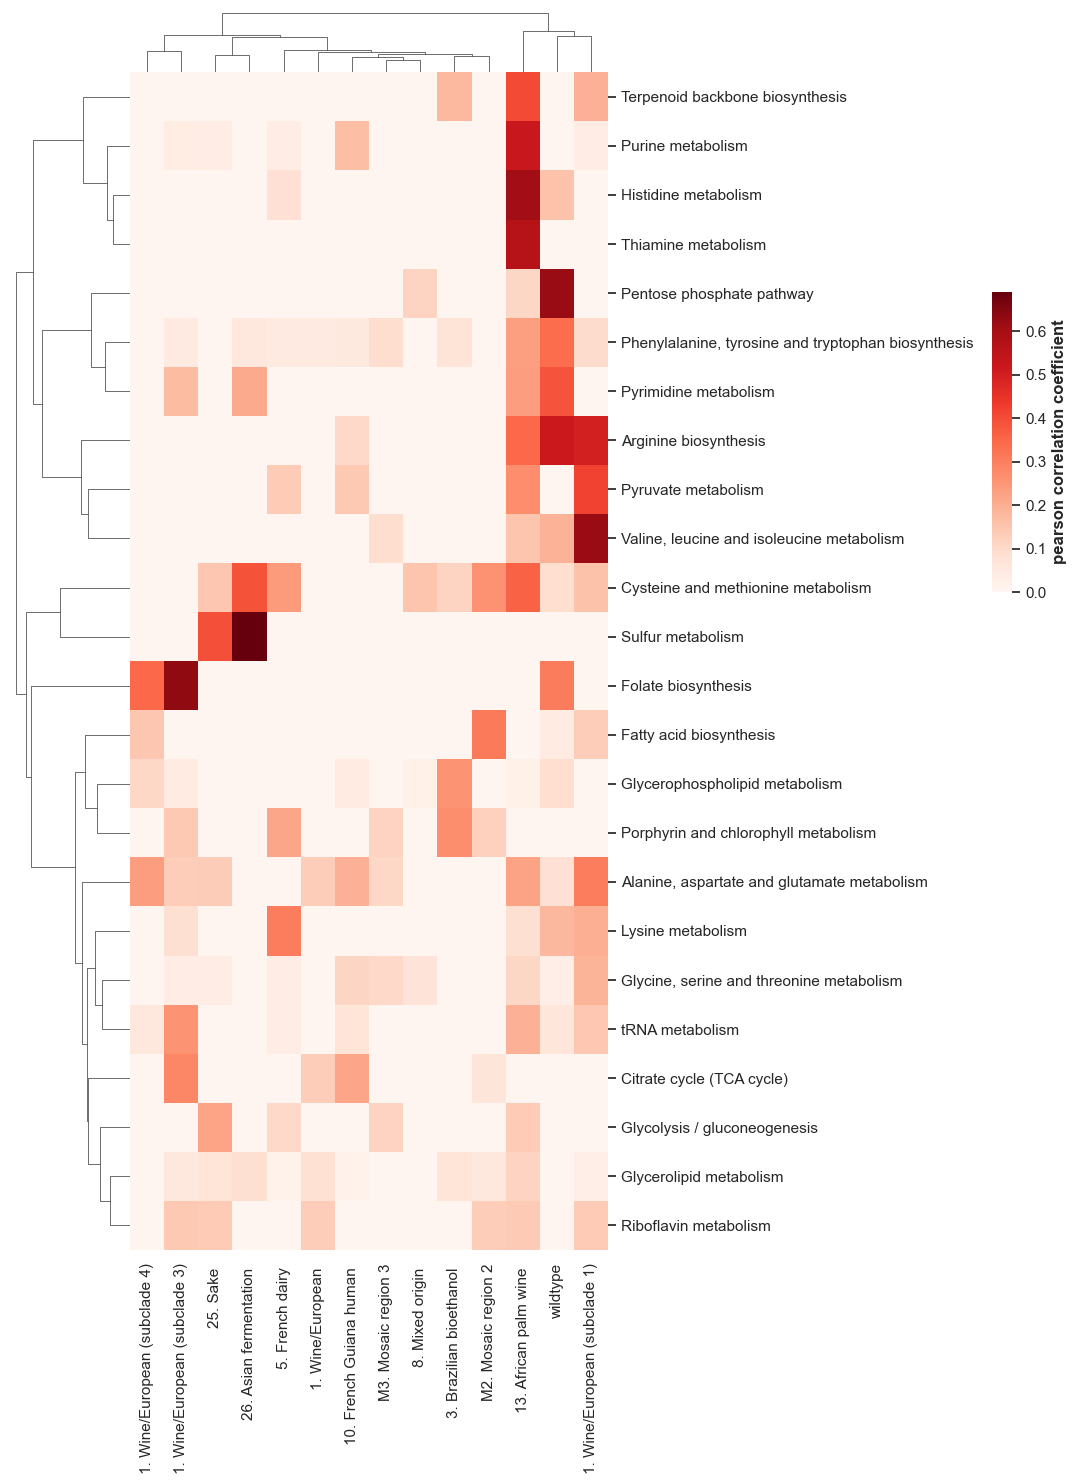

In [113]:
# plot cluster map for df_clades_pathway_mean_corr
sns.clustermap(data=df_clades_pathway_mean_corr,
               figsize=(10,15),
               vmin=0,
               metric='euclidean',
                method='ward',
               cmap='Reds',
               xticklabels=True,
               yticklabels=True,
               dendrogram_ratio=(.2, .05),
               )

# modify colorbar
# get the colorbar
cbar=plt.gcf().axes[-1]
# set the colorbar label
cbar.set_ylabel('pearson correlation coefficient',weight='bold',fontsize=12)
# set location of colorbar
cbar.set_position([1, .6, .02, .20])

# set title
# plt.title('Different clades correlation between transcription and flux for different pathways',fontsize=15,fontweight='bold')
plt.show()

#### 5.different growth type strains flux-transcription regulation comparison
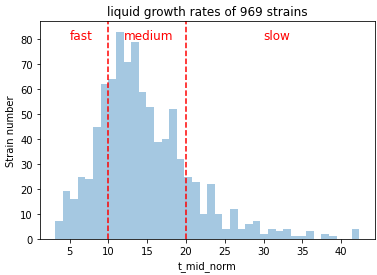

In [88]:
# df_strain_info
# slow_strainlist=df_strain_info[df_strain_info['growth_type']=='slow'].index.tolist()
# fast_strainlist=df_strain_info[df_strain_info['growth_type']=='fast'].index.tolist()
# medium_strainlist=df_strain_info[df_strain_info['growth_type']=='medium'].index.tolist()

# # random sample 40 strains from each group
# random.seed(123)
# slow_strainlist=random.sample(slow_strainlist,40)
# fast_strainlist=random.sample(fast_strainlist,40)
# medium_strainlist=random.sample(medium_strainlist,40)

In [114]:
df_growth_data=pd.read_csv('data/transcriptomics/combined_969growth_data.csv',index_col=0)
# remove rows with genome_id is NaN
df_growth_data=df_growth_data[df_growth_data['genome_id'].notnull()]
#set genome_id as index
df_growth_data=df_growth_data.set_index('genome_id')

# only keep strains exist in rxn_fcMatrix column and df_strain_info index
keep_strainlist=list(set(rxn_fcMatrix.columns.tolist()).intersection(set(df_strain_info.index.tolist())))
df_growth_data=df_growth_data[df_growth_data.index.isin(keep_strainlist)]

# sort by t_mid_norm
df_growth_data=df_growth_data.sort_values(by=['t_mid_norm'])

# extract top 50 as fast , bottom 50 as slow, and middle 50 as medium
fast_strainlist=df_growth_data.index[:50].tolist()
medium_strainlist=df_growth_data.index[325:375].tolist()
slow_strainlist=df_growth_data.index[-50:].tolist()

In [115]:
# calculate the different growth type strains correlation between transcription and flux
df_growth_type_corr_expression_flux=pd.DataFrame(index=rxn_fcMatrix.index)
df_growth_type_corr_expression_flux['slow']=calculate_clade_corr_expression_flux(slow_strainlist,rxn_fcMatrix,fluxMatrix)
df_growth_type_corr_expression_flux['medium']=calculate_clade_corr_expression_flux(medium_strainlist,rxn_fcMatrix,fluxMatrix)
df_growth_type_corr_expression_flux['fast']=calculate_clade_corr_expression_flux(fast_strainlist,rxn_fcMatrix,fluxMatrix)

# remove rxns with all value less than 0
df_growth_type_corr_expression_flux=df_growth_type_corr_expression_flux[(df_growth_type_corr_expression_flux>0).any(axis=1)]
df_growth_type_corr_expression_flux

c:\Users\miniY\.conda\envs\data\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\miniY\.conda\envs\data\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
c:\Users\miniY\.conda\envs\data\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,slow,medium,fast
r_0024,0.301422,0.000000,0.000000
r_4484,0.317615,0.348641,0.000000
r_2994,0.000000,0.000000,0.291357
r_0537,0.000000,0.000000,0.359289
r_0236,0.000000,0.291351,0.000000
...,...,...,...
r_1084,0.000000,0.292164,0.000000
r_2624,0.000000,0.303130,0.000000
r_0507,0.308499,0.456044,0.000000
r_0886,0.000000,0.000000,0.335593


In [146]:
# save df_growth_type_corr_expression_flux
df_growth_type_corr_expression_flux.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/df_growth_type_pearson_expression_flux.csv')


slow 0.5624287583729455
medium 1.0
fast 0.0009275592897023166


C:\Users\miniY\AppData\Local\Temp\ipykernel_17400\1042322550.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_growth_type_corr_expression_flux.loc[~(df_growth_type_corr_expression_flux==0).all(axis=1)],shade=True,ax=ax)
c:\Users\miniY\.conda\envs\data\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


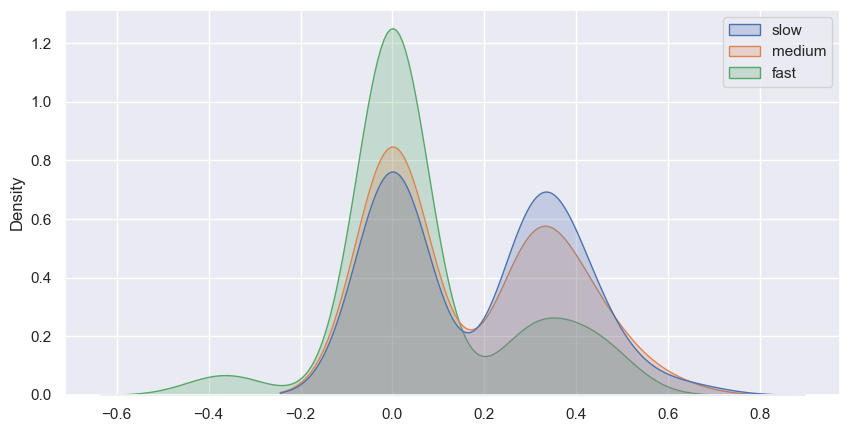

In [116]:
# calculate the p value for each growth types compare to medium growth type
from scipy.stats import ttest_ind
for growth_type in df_growth_type_corr_expression_flux.columns:
    print(growth_type,ttest_ind(df_growth_type_corr_expression_flux['medium'],df_growth_type_corr_expression_flux[growth_type])[1])
# plot histogram to compare the distribution of correlation coefficient for each growth type
sns.set()
fig,ax=plt.subplots(1,1,figsize=(10,5))
# plot kde plot
sns.kdeplot(data=df_growth_type_corr_expression_flux.loc[~(df_growth_type_corr_expression_flux==0).all(axis=1)],shade=True,ax=ax)
# set y limit
# plt.ylim(0,200)
plt.show()

slow 0.5624287583729455
medium 1.0
fast 0.0009275592897023166


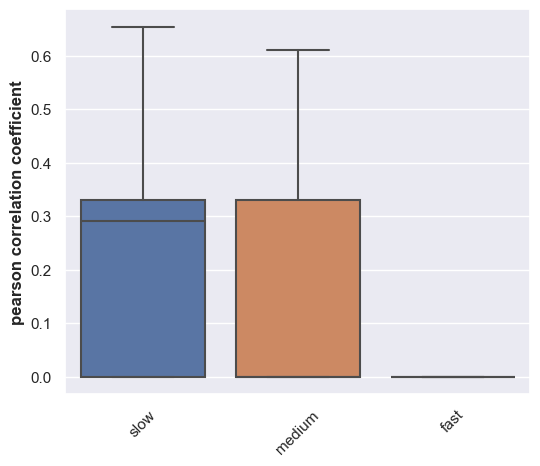

In [117]:
# calculate the p value for each growth types compare to medium growth type
from scipy.stats import ttest_ind
for growth_type in df_growth_type_corr_expression_flux.columns:
    print(growth_type,ttest_ind(df_growth_type_corr_expression_flux['medium'],df_growth_type_corr_expression_flux[growth_type])[1])

# plot boxplot to compare the distribution of r_expression_flux abosolute value for each clade
sns.set()
fig,ax=plt.subplots(1,1,figsize=(6,5))
# plot violinplot with absolute value
sns.boxplot(data=df_growth_type_corr_expression_flux,ax=ax,showfliers=False)
# rotate x axis label
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# set y axis label
ax.set_ylabel('pearson correlation coefficient',weight='bold',fontsize=12)
plt.show()

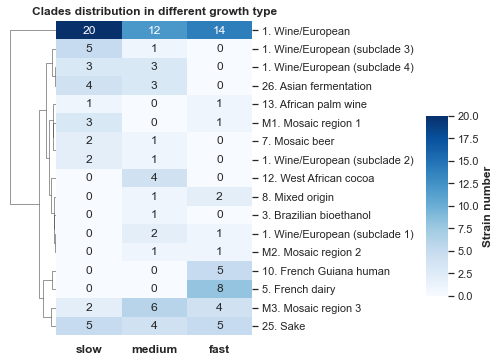

In [122]:
# check the different growth type strains' clade distribution
df_growth_type_clade=pd.DataFrame(index=check_cladelist)
df_growth_type_clade['slow']=df_strain_info.loc[slow_strainlist,'nature_clade'].value_counts()
df_growth_type_clade['medium']=df_strain_info.loc[medium_strainlist,'nature_clade'].value_counts()
df_growth_type_clade['fast']=df_strain_info.loc[fast_strainlist,'nature_clade'].value_counts()
# df_growth_type_clade['total']=df_growth_type_clade.sum(axis=1)
# fill nan with 0
df_growth_type_clade=df_growth_type_clade.fillna(0)
# remove all 0 rows
df_growth_type_clade=df_growth_type_clade.loc[(df_growth_type_clade!=0).any(axis=1)]

# plot cluster map for df_growth_type_clade
ax=sns.clustermap(data=df_growth_type_clade,
                  figsize=(6,5),
                metric='euclidean',
                method='ward',
                cmap='Blues',
                xticklabels=True,
                yticklabels=True,
                dendrogram_ratio=(.2,0),   
                # show values in each cell
                annot=True,
                fmt='.0f',
                # vmin=0,
                # do not calculate dendrogram for columns
                col_cluster=False,
                )

# modify colorbar
# get the colorbar
cbar=plt.gcf().axes[-1]
# set the colorbar label
cbar.set_ylabel('Strain number',weight='bold',fontsize=12)
# set location of colorbar
cbar.set_position([1, .2, .05, .5])
# set xticklabels order as slow, medium, fast
ax.ax_heatmap.set_xticklabels(['slow','medium','fast'],rotation=0,fontsize=12,weight='bold')
# set title
ax.ax_heatmap.set_title('Clades distribution in different growth type',fontsize=12,weight='bold')
plt.show()

In [148]:
df_growth_type_clade.to_csv(r'code/7.transcriptomics_ssGEMs_analysis/output/df_growth_types_clade_count.csv')

In [118]:
df_growth_type_pathway_mean_corr=pd.DataFrame(index=pathway_rxn_dict.keys())
for growth_type in df_growth_type_corr_expression_flux.columns:
    df_growth_type_pathway_mean_corr[growth_type]=calculate_pathway_tmp_flux_corr(pathway_rxn_dict,df_growth_type_corr_expression_flux[growth_type])

# remove rows with all Nan value
df_growth_type_pathway_mean_corr=df_growth_type_pathway_mean_corr.fillna(0)

# remove rows with all value <=0.1
# df_growth_type_pathway_mean_corr=df_growth_type_pathway_mean_corr[(df_growth_type_pathway_mean_corr>0.1).all(axis=1)]

# only keep rows with at least one value >0.2
df_growth_type_pathway_mean_corr=df_growth_type_pathway_mean_corr[(df_growth_type_pathway_mean_corr>0).any(axis=1)]
df_growth_type_pathway_mean_corr

,slow,medium,fast
Cysteine and methionine metabolism,0.253152,0.272755,0.320538
Glycerolipid metabolism,0.148124,0.103343,0.064127
Glycerophospholipid metabolism,0.078811,0.255073,0.000000
"Glycine, serine and threonine metabolism",0.231374,0.426932,0.000000
Glycolysis / gluconeogenesis,0.086895,0.159291,0.171566
"Phenylalanine, tyrosine and tryptophan biosynthesis",0.232131,0.454817,0.101367
Porphyrin and chlorophyll metabolism,0.000000,0.000000,0.430797
Sulfur metabolism,0.216516,0.217109,-0.364328


In [150]:
# save df_growth_type_pathway_mean_corr
df_growth_type_pathway_mean_corr.to_csv('code/7.transcriptomics_ssGEMs_analysis/output/df_growth_type_pathway_mean_pearson.csv')

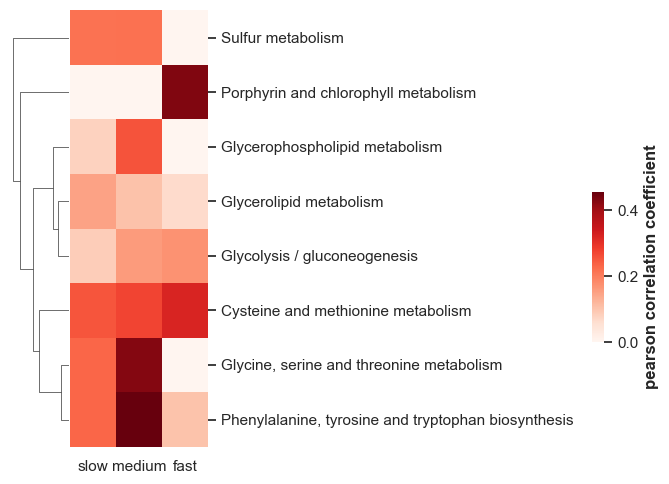

In [119]:
# plot heatmap for df_growth_type_pathway_mean_corr
# set cbar values range from -0.8 to 0.8
sns.clustermap(data=df_growth_type_pathway_mean_corr,
               figsize=(6,5),
               vmin=0,
               metric='euclidean',
                method='ward',
               cmap='Reds',
               xticklabels=True,
               yticklabels=True,
               dendrogram_ratio=(.3,0),
               col_cluster=False
               )

# modify colorbar
# get the colorbar
cbar=plt.gcf().axes[-1]
# set the colorbar label
cbar.set_ylabel('pearson correlation coefficient',weight='bold',fontsize=12)
# set location of colorbar
cbar.set_position([1, .3, .02, .30])
plt.show()

In [121]:
df_growth_type_pathway_mean_corr.describe()

,slow,medium,fast
count,8.000000,8.000000,8.000000
mean,0.155875,0.236165,0.090508
std,0.092357,0.153802,0.238852
min,0.000000,0.000000,-0.364328
25%,0.084874,0.145304,0.000000
50%,0.182320,0.236091,0.082747
75%,0.231563,0.311299,0.208809
max,0.253152,0.454817,0.430797
